In [ ]:
"""
===============================================================
📂 Script: ProyectoBIGDATA.ipynb
📌 Descripción:
Este script realiza la segmentación automática por lotes de una carpeta de imágenes de hojas cítricas,
identificando tres clases visuales: fondo, hoja sana y hoja enferma, mediante umbrales en el espacio de color HSV.

🔍 ¿Qué hace el script?
1. Recorre todas las imágenes dentro de una carpeta especificada.
2. Aplica segmentación automática basada en color (HSV).
3. Genera tres salidas por imagen:
   - Máscara multiclase (valores: 0 = fondo, 1 = hoja, 2 = enfermedad)
   - Máscara coloreada RGB (verde = hoja, rojo = enfermedad, negro = fondo)
   - Imagen original superpuesta con la máscara coloreada (tipo heatmap)

💾 Las salidas se guardan automáticamente en carpetas separadas:
   - Masks_auto/
   - Masks_coloreadas/
   - Superposiciones/
===============================================================
"""


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# 🗂️ RUTAS PRINCIPALES
# Se definen las rutas principales donde están las imágenes originales,
# y donde se guardarán las máscaras, las versiones coloreadas y las superposiciones.
carpeta_entrada = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/Images"
carpeta_masks = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/Masks_auto"
carpeta_coloreadas = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/Masks_coloreadas"
carpeta_superpuestas = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/Superposiciones"

# 🧠 FUNCIÓN DE SEGMENTACIÓN AUTOMÁTICA
# Convierte la imagen al espacio HSV y crea una máscara multiclase:
# clase 1 para hoja verde, clase 2 para enfermedad, clase 0 para fondo.
# Se segmenta por rangos de color definidos empíricamente.
def segmentar_automaticamente(imagen):
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    mask = np.zeros(h.shape, dtype=np.uint8)
    mask[(h > 30) & (h < 90) & (s > 40) & (v > 50)] = 1  # hoja verde
    mask[(h > 10) & (h < 30) & (s > 50) & (v > 50)] = 2  # enfermedad
    return mask

# 🔄 RECORRER SUBCARPETAS (CLASES)
# Recorre cada subcarpeta (una por clase de hoja) dentro del dataset.
# Esto permite procesar las imágenes clasificadas según tipo de daño.
for clase in os.listdir(carpeta_entrada):
    ruta_clase = os.path.join(carpeta_entrada, clase)
    if not os.path.isdir(ruta_clase):
        continue

    # Crea carpetas espejo para guardar las salidas por clase (máscaras, coloreadas, superpuestas).
    ruta_mask_clase = os.path.join(carpeta_masks, clase)
    ruta_color_clase = os.path.join(carpeta_coloreadas, clase)
    ruta_super_clase = os.path.join(carpeta_superpuestas, clase)
    os.makedirs(ruta_mask_clase, exist_ok=True)
    os.makedirs(ruta_color_clase, exist_ok=True)
    os.makedirs(ruta_super_clase, exist_ok=True)

    # Procesa cada imagen dentro de la subcarpeta
    for nombre in os.listdir(ruta_clase):
        if not nombre.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        ruta_imagen = os.path.join(ruta_clase, nombre)
        imagen = cv2.imread(ruta_imagen)
        if imagen is None:
            print(f"⚠️ Imagen no cargada: {nombre}")
            continue

        base = os.path.splitext(nombre)[0]
        mascara = segmentar_automaticamente(imagen)

        # 💾 Guarda la máscara cruda en escala de grises (valores 0, 1, 2)
        # útil para análisis cuantitativo o como input para modelos.
        cv2.imwrite(os.path.join(ruta_mask_clase, base + "_mask.png"), mascara)

        # 🎨 Crea una máscara RGB coloreada para visualizar:
        # verde para hoja sana, rojo para enfermedad, negro para fondo.
        mascara_rgb = np.zeros_like(imagen)
        mascara_rgb[mascara == 1] = [0, 255, 0]     # hoja sana → verde
        mascara_rgb[mascara == 2] = [255, 0, 0]     # enfermedad → rojo
        mascara_rgb[mascara == 0] = [0, 0, 0]       # fondo → negro
        cv2.imwrite(os.path.join(ruta_color_clase, base + "_mask_coloreada.png"), mascara_rgb)

        # 🧃 Crea una superposición entre la imagen original y la máscara coloreada
        # para facilitar la validación visual del resultado.
        imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        superpuesta = cv2.addWeighted(imagen_rgb, 0.7, mascara_rgb, 0.3, 0)
        cv2.imwrite(os.path.join(ruta_super_clase, base + "_superpuesta.png"), cv2.cvtColor(superpuesta, cv2.COLOR_RGB2BGR))

        # ✅ Mensaje de seguimiento para saber que la imagen fue procesada correctamente.
        print(f"✅ Procesada: {clase}/{nombre}")



✅ Procesada: Citrus_leafminer/Citrus_leafminer_001.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_002.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_003.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_004.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_005.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_006.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_007.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_008.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_009.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_010.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_011.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_012.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_013.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_014.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_015.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_016.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_017.jpg
✅ Procesada: Citrus_leafminer/Citrus_leafminer_018.jpg
✅ Procesad

In [ ]:
"""
===============================================================
📌 Descripción:
Este script analiza todas las máscaras multiclase generadas por el proceso
de segmentación automática, calculando el porcentaje de área enferma en
cada imagen con base en la proporción de píxeles clasificados como '2'.

🔍 ¿Qué hace el script?
1. Recorre todas las máscaras en la carpeta Masks_auto/
2. Cuenta cuántos píxeles corresponden a:
   - Hoja total (valores 1 y 2)
   - Hoja enferma (valor 2)
3. Calcula el porcentaje de enfermedad en cada imagen
4. Exporta los resultados en un DataFrame para visualización o exportación

📈 Salidas:
- Consola: tabla con imagen, área total, área enferma, y porcentaje de enfermedad
- Opcional: exportación a Excel o CSV

===============================================================
"""


In [ ]:
# 📦 LIBRERÍAS
# Se importan las librerías necesarias para leer imágenes, manejar datos y recorrer carpetas.
import os
import cv2
import numpy as np
import pandas as pd

# 🗂️ RUTA A CARPETA GENERAL DE MÁSCARAS
# Ruta donde están las máscaras segmentadas automáticamente (valores 0 = fondo, 1 = hoja, 2 = enfermedad).
carpeta_masks = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/Masks_auto"

# 📋 LISTA PARA GUARDAR RESULTADOS
# Se inicializa una lista donde se almacenará la información por imagen: área total, enferma y porcentaje.
resultados = []

# 🔄 RECORRER TODAS LAS SUBCARPETAS
# Se recorren todas las clases (subcarpetas), procesando cada imagen de máscara.
for clase in os.listdir(carpeta_masks):
    ruta_clase = os.path.join(carpeta_masks, clase)
    if not os.path.isdir(ruta_clase):
        continue

    for archivo in os.listdir(ruta_clase):
        if not archivo.lower().endswith((".png", ".jpg", ".jpeg")):
            continue

        ruta = os.path.join(ruta_clase, archivo)
        mascara = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)  # Se lee en escala de grises para obtener los valores de clase
        if mascara is None:
            continue

        # Calcula el área total de hoja (clases 1 y 2) y el área afectada (solo clase 2).
        total_hoja = np.sum((mascara == 1) | (mascara == 2))
        area_enferma = np.sum(mascara == 2)
        porcentaje = (area_enferma / total_hoja) * 100 if total_hoja != 0 else 0

        # Guarda los resultados en un diccionario para esta imagen.
        resultados.append({
            "Clase": clase,
            "Imagen": archivo,
            "Área total hoja (px)": total_hoja,
            "Área enferma (px)": area_enferma,
            "Porcentaje de enfermedad (%)": round(porcentaje, 2)
        })

# 📊 CONVERTIR A DATAFRAME
# Se convierte la lista de resultados en un DataFrame de pandas para análisis o exportación.
df = pd.DataFrame(resultados)

# 👁 Mostrar resumen
# Imprime en pantalla los primeros resultados para verificación rápida.
print(df.head())

# 💾 EXPORTAR RESULTADOS
# Guarda el DataFrame como un archivo CSV con los porcentajes por imagen.
ruta_salida = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/porcentajes_enfermedad.csv"
df.to_csv(ruta_salida, index=False)
print(f"✅ Resultados exportados a: {ruta_salida}")



              Clase                         Imagen  Área total hoja (px)  \
0  Citrus_leafminer  Citrus_leafminer_001_mask.png               2703563   
1  Citrus_leafminer  Citrus_leafminer_002_mask.png               2642439   
2  Citrus_leafminer  Citrus_leafminer_003_mask.png               1989957   
3  Citrus_leafminer  Citrus_leafminer_004_mask.png               1956027   
4  Citrus_leafminer  Citrus_leafminer_005_mask.png               1502441   

   Área enferma (px)  Porcentaje de enfermedad (%)  
0             117300                          4.34  
1             354130                         13.40  
2              25046                          1.26  
3             296322                         15.15  
4               9298                          0.62  
✅ Resultados exportados a: C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/porcentajes_enfermedad.csv


In [ ]:
"""
===============================================================

📌 Descripción:
Este script visualiza gráficamente los resultados del análisis de segmentación
foliar previamente calculado. Genera una gráfica de barras que muestra el
porcentaje de área afectada por enfermedad para cada imagen procesada.

🔍 ¿Qué hace el script?
1. Lee el archivo .CSV con los porcentajes de enfermedad por imagen.
2. Ordena las imágenes desde la más afectada hasta la menos afectada.
3. Genera una gráfica de barras horizontales donde:
   - Eje Y: nombre de la imagen
   - Eje X: porcentaje de enfermedad (%)

🎨 Salida:
- Gráfico interactivo con `matplotlib`, ideal para interpretación rápida,
  informes o presentaciones visuales del fenotipado vegetal.

===============================================================
"""

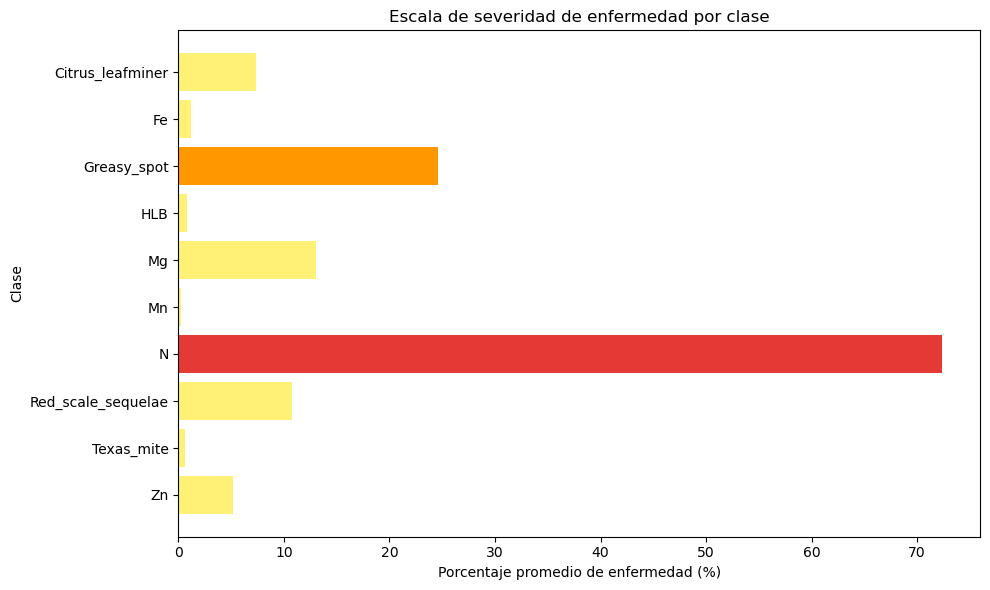

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 📄 Ruta al CSV
# Ruta del archivo CSV generado con los porcentajes de área enferma por imagen.
csv_path = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/porcentajes_enfermedad.csv"

# 📊 Leer el archivo con separador ;
# Se carga el archivo usando ";" como separador (útil si se exportó desde Excel o configurado así).
df = pd.read_csv(csv_path, sep=';')

# 🧼 Convertir columnas numéricas
# Asegura que las columnas numéricas sean tratadas correctamente (por si vienen como texto).
df["Área total hoja (px)"] = pd.to_numeric(df["Área total hoja (px)"], errors='coerce')
df["Área enferma (px)"] = pd.to_numeric(df["Área enferma (px)"], errors='coerce')
df["Porcentaje de enfermedad (%)"] = pd.to_numeric(df["Porcentaje de enfermedad (%)"], errors='coerce')

# 🚫 Excluir clase Healthy
# Se eliminan las muestras sanas ('Healthy') para enfocarse solo en clases con enfermedad.
df = df[df["Clase"].str.lower() != "healthy"]

# 📊 Agrupar por clase y promediar
# Calcula el promedio del porcentaje de enfermedad por clase, útil para visualización comparativa.
df_prom = df.groupby("Clase").mean(numeric_only=True).reset_index()

# 🎨 Definir colores según rangos personalizados
# Se asignan colores dependiendo del porcentaje de enfermedad promedio (una escala de severidad).
colores = []
for porcentaje in df_prom["Porcentaje de enfermedad (%)"]:
    if porcentaje <= 18:
        colores.append("#fff176")  # amarillo claro
    elif porcentaje <= 36:
        colores.append("#ff9800")  # amarillo
    elif porcentaje <= 54:
        colores.append("#ff9800")  # naranja
    else:
        colores.append("#e53935")  # rojo

# 📈 Graficar
# Se crea una gráfica de barras horizontales para mostrar visualmente la severidad por clase.
plt.figure(figsize=(10, 6))
plt.barh(df_prom["Clase"], df_prom["Porcentaje de enfermedad (%)"], color=colores)
plt.xlabel("Porcentaje promedio de enfermedad (%)")
plt.ylabel("Clase")
plt.title("Escala de severidad de enfermedad por clase")
plt.tight_layout()
plt.gca().invert_yaxis()  # Coloca la clase más afectada arriba
plt.show()


In [ ]:
"""
📦 Script: División del dataset en entrenamiento y validación (80/20)

🔍 Descripción:
Este script toma una carpeta principal de imágenes organizadas por clases (subcarpetas)
y las divide automáticamente en dos subconjuntos:
- 📁 train/: 80% de las imágenes para entrenamiento
- 📁 val/:   20% de las imágenes para validación

📂 Estructura esperada de entrada:
Proyecto_Fenotipado/
└── Images/
    ├── Clase_1/
    ├── Clase_2/
    └── ...

📂 Estructura de salida generada:
Proyecto_Fenotipado/
└── Dataset/
    ├── train/
    │   ├── Clase_1/
    │   └── Clase_2/
    └── val/
        ├── Clase_1/
        └── Clase_2/

🛡️ Este proceso copia las imágenes, por lo que no modifica ni borra los archivos originales.
🎯 Preparación ideal para modelos de clasificación automática con redes neuronales (CNN).

"""


In [ ]:
import os
import shutil
import random

# 📁 Carpeta de entrada con todas las clases
# Esta carpeta contiene una subcarpeta por clase (ej. 'Clorosis', 'Manchas', etc.) con sus imágenes.
carpeta_origen = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/Images"

# 📁 Carpeta de salida donde se guardarán las carpetas 'train/' y 'val/'
# Aquí se generará un nuevo dataset organizado para entrenamiento y validación.
carpeta_salida = r"C:/Users/Isabe/OneDrive/Escritorio/Proyecto_Fenotipado/Dataset"
carpeta_train = os.path.join(carpeta_salida, "train")
carpeta_val = os.path.join(carpeta_salida, "val")

# 🔁 Crear carpetas de salida si no existen
# Se asegura que existan las carpetas destino para guardar las divisiones.
os.makedirs(carpeta_train, exist_ok=True)
os.makedirs(carpeta_val, exist_ok=True)

# 🎯 División 80/20
# Define el porcentaje de imágenes que irá al conjunto de entrenamiento.
porcentaje_entrenamiento = 0.8

# 🔁 Recorrer todas las subcarpetas por clase
# Se itera sobre cada clase, dividiendo sus imágenes aleatoriamente entre train y val.
for clase in os.listdir(carpeta_origen):
    ruta_clase = os.path.join(carpeta_origen, clase)
    if not os.path.isdir(ruta_clase):
        continue

    # Listar imágenes válidas (JPG, PNG...)
    imagenes = [f for f in os.listdir(ruta_clase) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    random.shuffle(imagenes)  # Mezcla aleatoria para asegurar distribución equilibrada

    n_train = int(len(imagenes) * porcentaje_entrenamiento)
    imagenes_train = imagenes[:n_train]
    imagenes_val = imagenes[n_train:]

    # Crear carpetas destino por clase (una en train y otra en val)
    os.makedirs(os.path.join(carpeta_train, clase), exist_ok=True)
    os.makedirs(os.path.join(carpeta_val, clase), exist_ok=True)

    # Copiar imágenes al conjunto de entrenamiento
    for img in imagenes_train:
        shutil.copy2(os.path.join(ruta_clase, img), os.path.join(carpeta_train, clase, img))

    # Copiar imágenes al conjunto de validación
    for img in imagenes_val:
        shutil.copy2(os.path.join(ruta_clase, img), os.path.join(carpeta_val, clase, img))

    # ✅ Mensaje por clase indicando cuántas imágenes fueron asignadas a cada conjunto
    print(f"✅ Clase '{clase}': {len(imagenes_train)} train / {len(imagenes_val)} val")

# 🚀 Confirmación final
# Mensaje que indica que la división se completó correctamente.
print("🚀 División completa. Listo para entrenamiento.")



✅ Clase 'Citrus_leafminer': 80 train / 20 val
✅ Clase 'Fe': 80 train / 20 val
✅ Clase 'Greasy_spot': 80 train / 20 val
✅ Clase 'Healthy': 80 train / 20 val
✅ Clase 'HLB': 40 train / 10 val
✅ Clase 'Mg': 80 train / 20 val
✅ Clase 'Mn': 40 train / 10 val
✅ Clase 'N': 40 train / 10 val
✅ Clase 'Red_scale_sequelae': 104 train / 26 val
✅ Clase 'Texas_mite': 80 train / 20 val
✅ Clase 'Zn': 80 train / 20 val
🚀 División completa. Listo para entrenamiento.
